# Data preprocessing

In [14]:
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
#from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import random
import pickle
import cv2
import os

#### grab the image paths and randomly shuffle them

In [19]:
imagePaths = sorted(list(paths.list_images("/home/ilyes/Desktop/ipynb/dresses_classification/dataset")))
random.seed(42)
random.shuffle(imagePaths)


### create the appropriat input for the model
#### loop over the input images to
<br>
- append each image in a list named data
<br>
- append its label in a list named labels

In [22]:
# initialize the data and labels lists
data = []
labels = []
IMAGE_DIMS = (96, 96, 3)


for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)
 
    # extract set of class labels from the image path and update the
    # labels list
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

if you did not understand the labling try : 
<br>
imagePaths[0].split(os.path.sep)[-2].split("_")
***

#### convert the lists to arrays (the input requires arrays)

In [23]:
# we divide on 255 for data normalisation
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [24]:
print("[INFO] data matrix: {} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

[INFO] data matrix: 2165 images (467.64MB)


***
## change the type of the labels
each class is doubely labeled ( exp : dress , red or jean , black) , this is called multi-class classification <br>
We need to binarize the labels (exp : red dress  becomes [001010] , black jean becomes [010001]<br>

to do this we utilize the scikit-learn library’s MultiLabelBinarizer class

In [25]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

One-hot encoding transforms categorical labels from a single integer to a vector. The same concept applies here except this is a case of two-hot encoding.

you can skip the scoop below if you perfectly understood the transformation we did to 'labels'

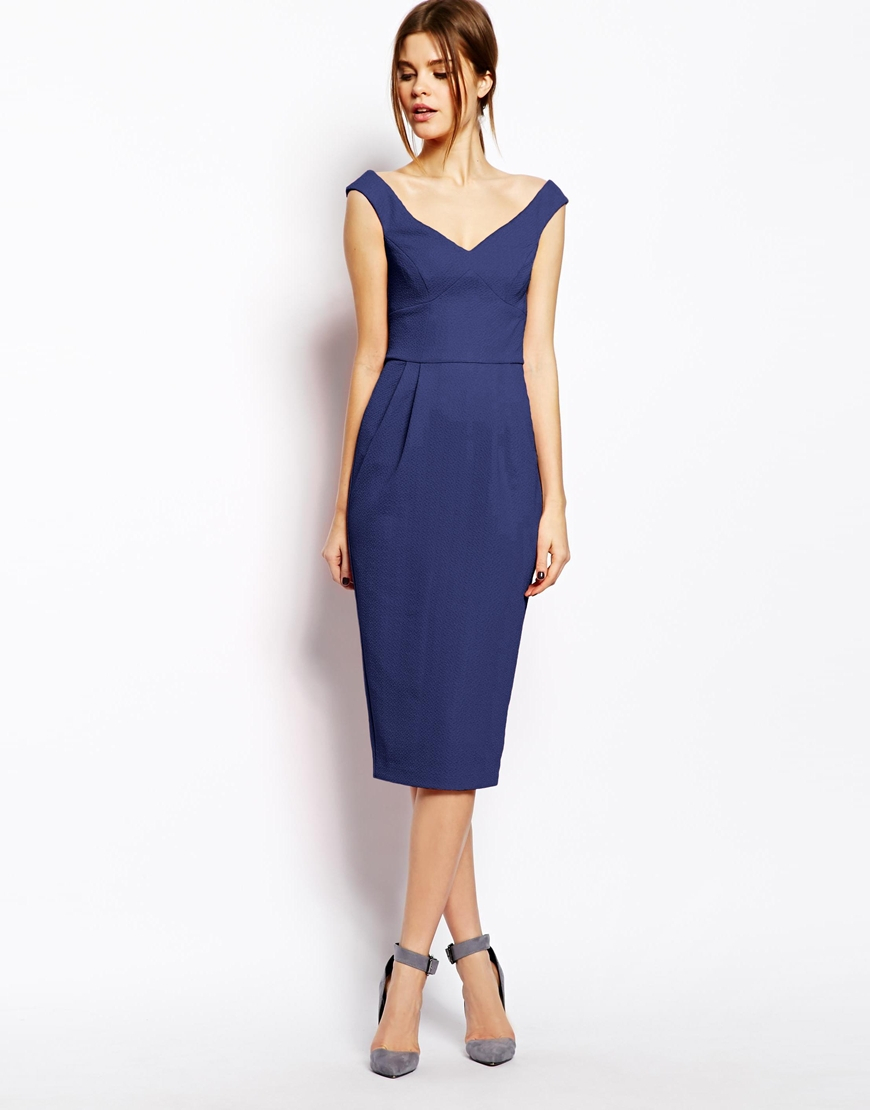

['black' 'blue' 'dress' 'jeans' 'red' 'shirt']
[0 1 1 0 0 0]


In [27]:
from IPython.core.display import Image, display
random_number=0
img=imagePaths[random_number]
display(Image( img, width=200, unconfined=True))

print(mlb.classes_)
print(labels[random_number])

as you can see , ['bleu', 'dress']  is transformed to [011000] <br>
you can change the 'random_number' and check the transformation
***

### construct the training and testing splits

In [28]:
# partition the data into training and testing splits using 80% 
#of the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels,
    test_size=0.2, random_state=42)

In [29]:
print("TrainingSet :")
print(trainX.shape  )
print(trainY.shape  )
print(" \n TestingSet :")
print(testX.shape  )
print(testY.shape  )

TrainingSet :
(1732, 96, 96, 3)
(1732, 6)
 
 TestingSet :
(433, 96, 96, 3)
(433, 6)
